In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from array import array


In [2]:
#cargar data set
data_array = np.load ('data_proyecto/proyecto_data/proyecto_training_data.npy')
#data = pd.DataFrame (data_array,columns=["SalePrice","OverallQual","stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
#data.head(3)

In [3]:
# variables seleccionadas
stFlrSF =data_array[:,2]
OverallQual=data_array[:,1]
SalesPrice =data_array[:,0]

In [22]:
class Paramet():
    def __init__(self,hist_theta,hist_grad,hist_cost,n_iter):
        self.thetas=np.array(hist_theta)
        self.errores=np.array(hist_cost)
        self.gradientes=np.array(hist_grad)
        self.iteraciones=np.array(n_iter)   
    @classmethod
    def parametros(cls,hist_theta,hist_grad,hist_cost,n_iter):
        return cls(hist_theta,histo_grad,histo_cost,n_iter)
        
    
class Regresion():
    
    def __init__(self,X_train,X_test,y_train,y_test,α,epochs):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.α=α
        self.epochs=epochs
        self.x_b=np.hstack([self.X_train,np.ones_like(self.X_train)])
        
    def __del__(self):
        pass
    
    def funCosto(self,betas):
        return np.sum(np.square((self.x_b.dot(betas) - self.y_train))) / (2 * len(self.X_train))  # Calculo del error
    
    def betasAct(self,theta): # Thetas actualizado
        theta[0][0]=theta[0][0] - self.α * np.sum((self.x_b.dot(theta) - self.y_train)) / (len(self.X_train))
        theta[1][0]=theta[1][0] - self.α * np.sum(np.transpose((self.x_b.dot(theta) - self.y_train)) * (np.transpose(np.transpose(self.x_b)[1]))) / (len(self.X_train))
        return theta
    
    def funGrad(self,theta): # Thetas actualizado
        b0=self.α * np.sum((self.x_b.dot(theta) - self.y_train)) / (len(self.X_train))
        b1=self.α * np.sum(np.transpose((self.x_b.dot(theta) - self.y_train)) * (np.transpose(np.transpose(self.x_b)[1]))) / (len(self.X_train))
        return b0,b1
 
    def DescGrad(self):
        hist_cost = []                      # Lista vacia para almacenar el error en cada iteracion
        hist_grad = []                      # Lista vacia para almacenar el gradiente del error
        n_iter = []                         # Lista vacia para almacenar el numero de iteracion correcpondiente al error
        hist_theta=[]                       # Lista vacia para almacenar todos los betas
        theta = [[0],[0]]            # Inicializacion de los parametros b0 y b1 del modelo
        for _ in range(self.epochs):
            theta= self.betasAct(theta)
            hist_theta.append([theta[0][0],theta[1][0]])
            hist_cost.append(self.funCosto(theta))
            hist_grad.append(self.funGrad(theta))
            n_iter.append(_)
        
        return  Paramet(hist_theta,hist_grad,hist_cost,n_iter)
            
    def prediccion(self,x,thetas_hist):
        #x=np.array(x).reshape(-1,1)
        #thetas_hist=np.array(thetas_hist).reshape(-1,1)
        x=np.hstack([x,np.ones_like(x)])
        pred=x.dot(thetas_hist)
        return pred
        
    @classmethod 
    def parametros(cls,X,Y,α,epoch):
        X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size = 0.20,shuffle=False)

        X_train=np.reshape(X_train,(-1,1)) /1000
        y_train=np.reshape(y_train,(-1,1))/1000 # Vector dividido entre 1000 ya que las variables se desvordan por ser valores muy grandes
        X_test=np.reshape(X_test,(-1,1))/1000
        y_test=np.reshape(y_test,(-1,1))/1000
        return cls(X_train,X_test,y_train,y_test,α,epoch)
    
class Graficas():
    def __init__(self,x,y):
        self.eje_x=x
        self.eje_y=y
    
    def plot_err(self):
        plt.plot(self.eje_x,self.eje_y)
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')
        plt.title("Comportamiento del error en el tiempo")
        plt.show()
        
    @classmethod
    def grafica(cls,x,y):
        return cls(x,y)

In [65]:
rl=Regresion.parametros(stFlrSF,SalesPrice,0.7,3)

In [30]:
# Graficar el error con cada iteracion
def plot_err(x,y):
        plt.plot(x,y)
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')
        plt.title("Comportamiento del error en el tiempo")
        plt.show()

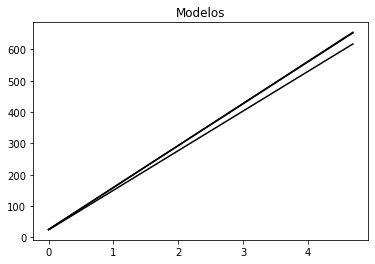

In [64]:
# Graficar los modelos
def plot_model(betas):
    b=betas[0]
    a=betas[1]
   # plt.scatter(rl.X_train, rl.y_train)
    pred_x = [0, max(rl.X_test)]
    pred_y = [a+b*0, a+b*max(rl.X_test)]
    plt.title('Modelos')
    plt.plot(pred_x, pred_y, "k")

#plot_model(xc.thetas[-1])
for i in (xc.iteraciones):
    plot_model(xc.thetas[i])



In [29]:
xc=rl.DescGrad()

<bound method Graficas.plot_err of <__main__.Graficas object at 0x7ff1903760d0>>

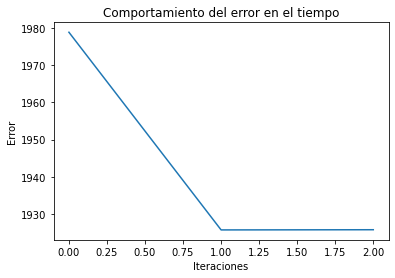

In [9]:
#rl.prediccion(rl.X_test,xc.thetas[-1])

array([191.23744127, 270.99938893, 175.41910543, 194.58878361,
       109.33063452, 244.85891869, 182.3898975 , 310.9473896 ,
       149.27863519, 135.20299737, 135.47110476, 176.2234276 ,
       199.54877027, 247.00377778, 348.75053118, 177.02774976,
       236.2794823 , 152.76403123, 161.47752131, 243.25027437,
       136.94569539, 163.35427302, 242.98216698, 127.96409792,
       138.42028602, 189.62879695, 114.42467487, 123.13816495,
       143.38027268, 134.80083629, 188.02015263, 210.80928053,
       141.36946728, 141.63757466, 144.05054115, 244.05459653,
       169.52074292, 319.92898707, 167.10777643, 253.43835507,
       197.53796487, 248.07620733, 166.97372274, 170.32506508,
       115.63115812, 154.23862186, 159.4667159 , 145.39107808,
       202.22984414, 201.69362937, 115.63115812, 115.63115812,
       147.80404457, 187.88609893, 182.12179011, 311.88576546,
       131.18138657, 178.10017931, 145.39107808, 147.80404457,
       253.70646246, 227.56599222, 207.99415296, 185.07

In [10]:
del rl

In [11]:
279*2*24.18


13492.44